<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Load-Coco-Animals-Dataset" data-toc-modified-id="Load-Coco-Animals-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Coco Animals Dataset</a></span></li><li><span><a href="#Load-ImageNet-dataset-for-labels" data-toc-modified-id="Load-ImageNet-dataset-for-labels-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load ImageNet dataset for labels</a></span></li><li><span><a href="#Predict-coco-animals-images-using-VGG16" data-toc-modified-id="Predict-coco-animals-images-using-VGG16-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Predict coco animals images using VGG16</a></span></li><li><span><a href="#Predict-coco-animals-images-using-retrained-VGG16" data-toc-modified-id="Predict-coco-animals-images-using-retrained-VGG16-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Predict coco animals images using retrained VGG16</a></span></li></ul></div>

# VGG16 in Keras <a class="tocSkip">

In [1]:
import math
import os

import numpy as np
np.random.seed(123)
print("NumPy:{}".format(np.__version__))

import pandas as pd
print("Pandas:{}".format(pd.__version__))

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,10
print("Matplotlib:{}".format(mpl.__version__))

import tensorflow as tf
tf.set_random_seed(123)
print("TensorFlow:{}".format(tf.__version__))

import keras
print("Keras:{}".format(keras.__version__))

from tensorflow.contrib import slim

NumPy:1.14.5
Pandas:0.22.0
Matplotlib:2.2.2
TensorFlow:1.11.0
Keras:2.2.4


Using TensorFlow backend.


In [2]:
DATASETSLIB_HOME = '../datasetslib'
import sys
if not DATASETSLIB_HOME in sys.path:
    sys.path.append(DATASETSLIB_HOME)
%reload_ext autoreload
%autoreload 2
import datasetslib

from datasetslib import util as dsu
from datasetslib import nputil
datasetslib.datasets_root = os.path.join(os.path.expanduser('~'),'datasets')
models_root = os.path.join(os.path.expanduser('~'),'models')

# VGG16 Model in Keras

In [3]:
# helper function

def disp(images,id2label=None,probs=None,n_top=5,scale=False):
    if scale:
        imgs = np.abs(images + np.array([[[[123.68, 116.78, 103.94]]]]))/255.0
    else:
        imgs = images

    ids={}
    for j in range(len(images)):
        if scale:
            plt.figure(figsize=(5,5))
            plt.imshow(imgs[j])
        else:
            plt.imshow(imgs[j].astype(np.uint8) )
        plt.show()
        if probs is not None:
            ids[j] = [i[0] for i in sorted(enumerate(-probs[j]), key=lambda x:x[1])]
            for k in range(n_top):
                id = ids[j][k]
                print('Probability {0:1.2f}% of [{1:}]'
                      .format(100*probs[j,id],id2label[id]))

### Load Coco Animals Dataset

In [4]:
# Load the dataset
from datasetslib.coco import coco_animals

coco = coco_animals()
x_train_files, y_train, x_val_files, x_val = coco.load_data()
x_test = [x_val_files[25*x] for x in range(8)]

Already exists: /home/ubuntu/datasets/coco-animals/coco-animals.zip


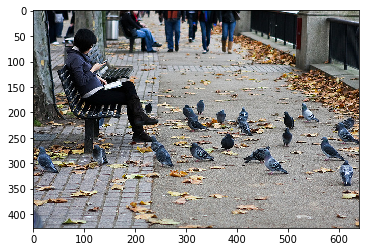

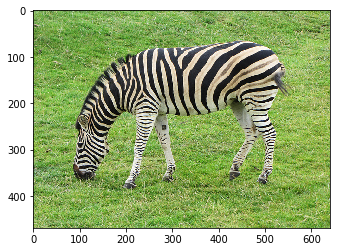

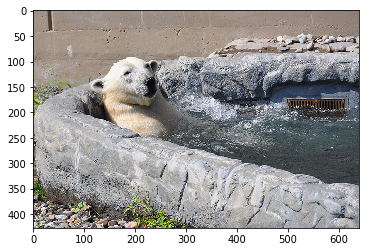

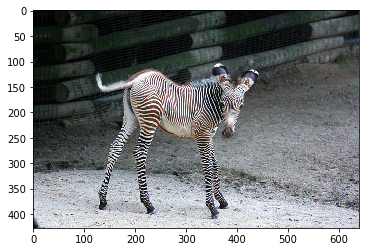

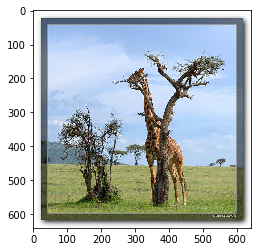

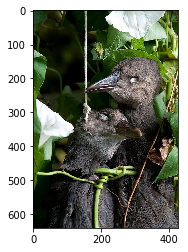

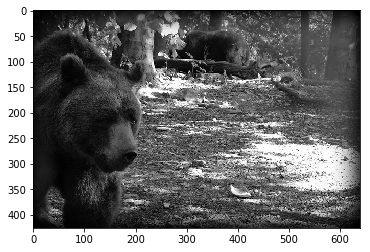

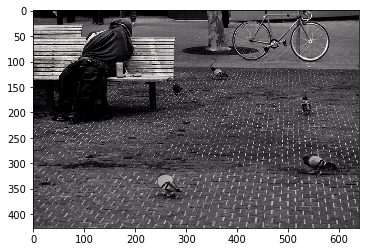

In [5]:
images=np.array([mpimg.imread(x) for x in x_test])

disp(images)

In [6]:
print([x.shape for x in images])

[(427, 640, 3), (469, 640, 3), (427, 640, 3), (427, 640, 3), (640, 640, 3), (640, 426, 3), (426, 640, 3), (427, 640, 3)]


In [7]:
images_test=np.array([coco.preprocess_for_vgg(x) for x in x_test])
print(images_test.shape)

(8, 224, 224, 3)


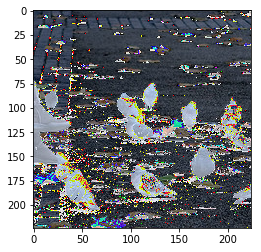

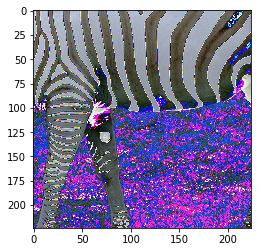

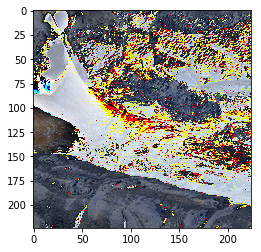

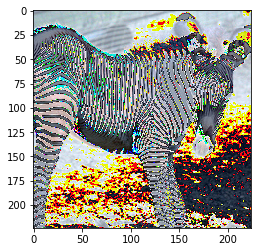

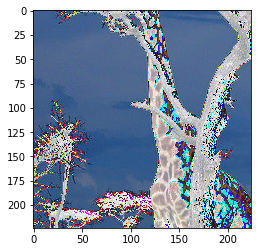

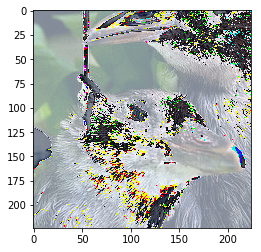

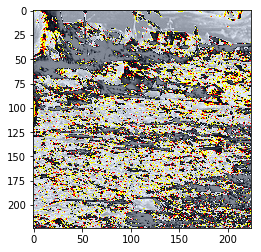

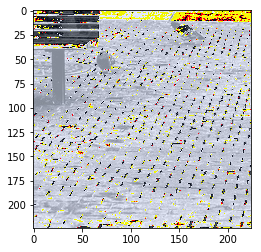

In [8]:
disp(images_test)

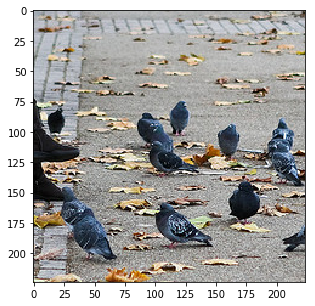

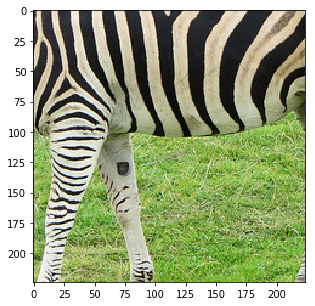

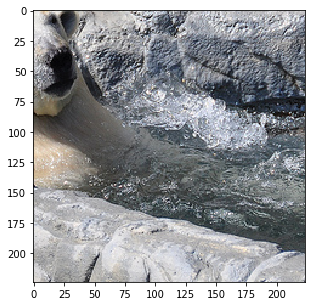

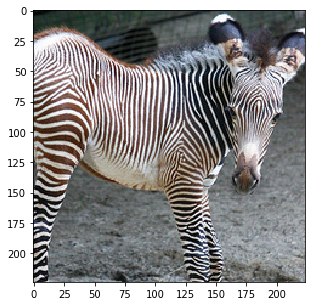

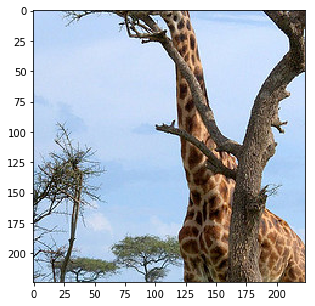

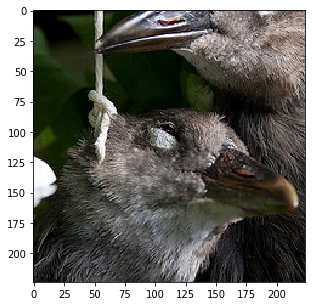

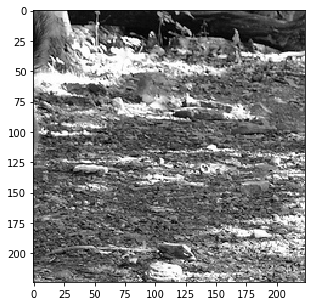

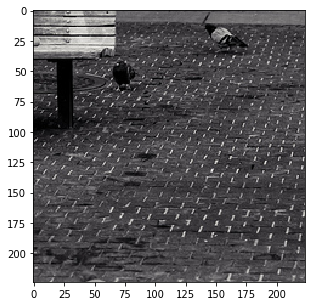

In [9]:
disp(images_test,scale=True)

### Load ImageNet dataset for labels

In [10]:
### Load ImageNet dataset for labels
from datasetslib.imagenet import imageNet
inet = imageNet()
inet.load_data()

### Predict coco animals images using VGG16

In [11]:
tf.reset_default_graph()
keras.backend.clear_session()

# load the vgg model
from keras.applications import VGG16

model=VGG16(weights='imagenet')

probs = model.predict(images_test)
print(probs.shape)

(8, 1000)


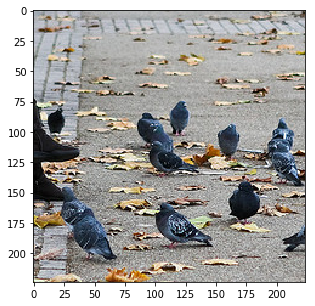

Probability 36.67% of [acorn]
Probability 23.24% of [partridge]
Probability 22.63% of [ruffed grouse, partridge, Bonasa umbellus]
Probability 7.05% of [quail]
Probability 1.63% of [conch]


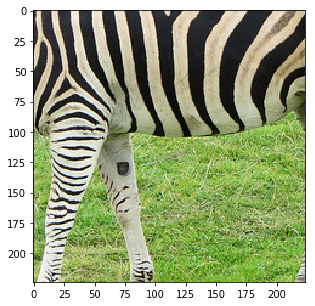

Probability 99.63% of [zebra]
Probability 0.16% of [impala, Aepyceros melampus]
Probability 0.13% of [gazelle]
Probability 0.02% of [hartebeest]
Probability 0.02% of [tiger, Panthera tigris]


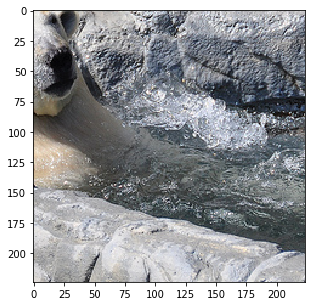

Probability 77.70% of [ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus]
Probability 3.14% of [brown bear, bruin, Ursus arctos]
Probability 2.06% of [sea lion]
Probability 1.75% of [geyser]
Probability 1.42% of [ram, tup]


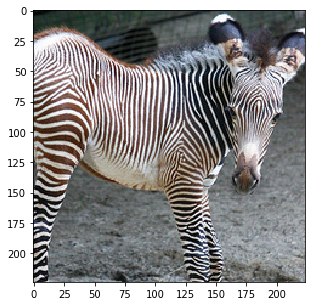

Probability 99.92% of [zebra]
Probability 0.07% of [gazelle]
Probability 0.00% of [impala, Aepyceros melampus]
Probability 0.00% of [ostrich, Struthio camelus]
Probability 0.00% of [hartebeest]


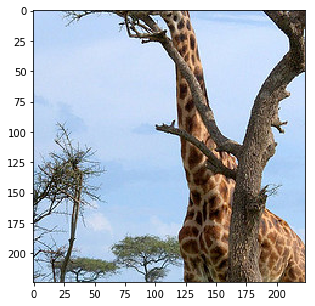

Probability 66.11% of [leopard, Panthera pardus]
Probability 12.03% of [cheetah, chetah, Acinonyx jubatus]
Probability 3.19% of [frilled lizard, Chlamydosaurus kingi]
Probability 1.88% of [agama]
Probability 1.50% of [zebra]


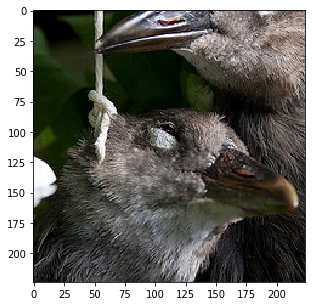

Probability 64.93% of [jay]
Probability 26.03% of [magpie]
Probability 5.19% of [water ouzel, dipper]
Probability 0.74% of [junco, snowbird]
Probability 0.68% of [European gallinule, Porphyrio porphyrio]


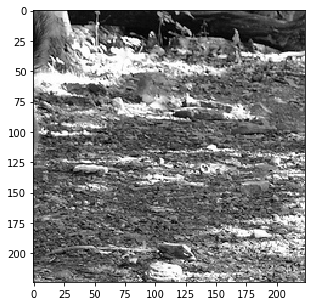

Probability 18.34% of [warthog]
Probability 10.82% of [Arabian camel, dromedary, Camelus dromedarius]
Probability 7.78% of [llama]
Probability 4.26% of [wild boar, boar, Sus scrofa]
Probability 3.82% of [bighorn, bighorn sheep, cimarron, Rocky Mountain bighorn, Rocky Mountain sheep, Ovis canadensis]


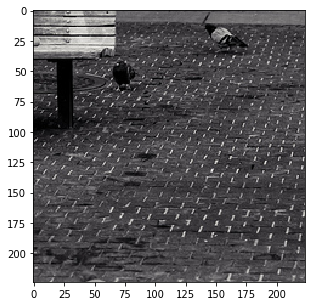

Probability 10.01% of [patio, terrace]
Probability 4.11% of [park bench]
Probability 3.78% of [planetarium]
Probability 3.75% of [prison, prison house]
Probability 3.27% of [shopping cart]


In [12]:
disp(images_test,id2label=inet.id2label,probs=probs,scale=True)